# Compare sig proteins in flagship and pancan 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import cptac
import cptac.pancan as pc
import cptac.utils as u
import plot_utils as p

In [4]:
#Import libraries
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
print('cptac version:', cptac.version())

cptac version: 0.9.1


In [26]:
flag = pd.read_csv('../Make_Tables/csv/all_proteins.csv').set_index('Proteomics')
print('flag:', len(flag))
pancan = pd.read_csv('csv/all_proteins_pancan.csv').set_index('Umich_Proteomics')
print('pancan:', len(pancan))
both = flag.join(pancan, lsuffix = '_flag', rsuffix = '_pc', how = 'outer')
both


flag: 15411
pancan: 16305


,GBM_P_Value_flag,GBM_Median_flag,HNSCC_P_Value_flag,HNSCC_Median_flag,LUAD_P_Value_flag,LUAD_Median_flag,LSCC_P_Value_flag,LSCC_Median_flag,BR_P_Value_flag,BR_Median_flag,...,HNSCC_P_Value_pc,HNSCC_Median_pc,LUAD_P_Value_pc,LUAD_Median_pc,LSCC_P_Value_pc,LSCC_Median_pc,BR_P_Value_pc,BR_Median_pc,EC_P_Value_pc,EC_Median_pc
A1BG,0.174513,-0.245016,0.299507,-0.207986,0.822938,-0.11030,0.668049,0.04120,0.543073,-1.00440,...,0.497389,-0.154293,0.763489,-0.021201,0.450720,-0.090679,0.999518,0.247278,0.569121,-0.060606
A1CF,NaN,NaN,NaN,4.355211,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.828011,NaN,0.062420,NaN,-0.329759,NaN,NaN,NaN,NaN
A2M,0.027923,-0.680437,0.215483,-0.371991,0.533492,-0.39840,0.235607,-0.63835,0.543073,-0.80760,...,0.361559,-0.441610,0.751492,-0.154217,0.135843,-0.227663,0.999518,0.337511,0.946911,0.006420
A2ML1,NaN,NaN,0.540405,0.257246,NaN,NaN,0.193942,3.55185,0.482632,1.31745,...,0.537254,0.419263,NaN,-0.578419,0.982567,0.076572,0.999518,0.699762,0.624001,0.354727
A4GALT,NaN,NaN,NaN,-0.006772,NaN,NaN,0.888343,-0.05590,NaN,NaN,...,NaN,1.378368,NaN,-0.473176,0.624854,0.003190,NaN,-0.236941,0.103221,0.478863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDC,0.805957,-0.010868,0.739467,0.234623,0.781226,0.20540,0.178098,0.88215,0.785649,-0.24385,...,0.738420,0.227160,0.989667,-0.012766,0.004181,0.351467,0.999518,-0.174000,0.022363,-0.413973
ZYG11B,0.239067,0.185994,0.814884,0.040935,0.135433,0.45530,0.529726,0.02470,0.859665,0.11285,...,0.941940,0.099488,0.115446,0.158866,0.740034,0.036967,0.999518,0.039123,0.410962,-0.112257
ZYX,0.299976,0.314468,0.598612,-0.096020,0.707051,-0.00720,0.172040,-0.30890,0.683528,0.28070,...,0.602630,-0.050990,0.848394,-0.020392,0.128659,-0.219780,0.999518,0.055705,0.670725,-0.014351
ZZEF1,0.259028,-0.131491,0.399018,-0.071424,0.484782,-0.13655,0.526385,-0.10210,0.883865,-0.18565,...,0.644037,-0.059344,0.689384,-0.062898,0.143234,-0.122346,0.999518,0.083720,0.407331,0.047886


# GBM

In [89]:
def sig(row):
    flag = False
    pancan = False
    if row['GBM_P_Value_flag'] <= 0.55:
        flag = True
    if row['GBM_P_Value_pc'] <= 0.2:
        print(row['GBM_P_Value_pc'])
        pancan = True

    if flag & pancan:
        print('both true')
        return 'both_sig'
    elif flag == True & pancan == False:
        print('flag sig')
        return 'flag_sig'
    elif pancan == True & flag == False:
        print('pancan sig')
        return 'pancan_sig'
    else:
        print('both false')
        return 'ns'

In [90]:
gbm = both[['GBM_P_Value_flag', 'GBM_P_Value_pc']]
t = gbm.head(1)
t['n'] = t.apply(sig, axis = 1)
t

both false


<ipython-input-90-7ed50352a316>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['n'] = t.apply(sig, axis = 1)


,GBM_P_Value_flag,GBM_P_Value_pc,n
A1BG,0.174513,0.227955,ns


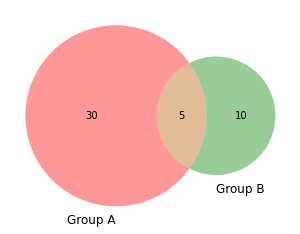

In [5]:
venn2(subsets = (30, 10, 5), set_labels = ('Group A', 'Group B'))

In [ ]:
og_genes = set(og_gbm_genes)
pancan_genes = set(pancan_gbm_genes)
venn2([og_genes,pancan_genes],("Flagship_genes", "Pancan_genes"))

# Step 1: Create df with Mutation Types

For each cancer type, create a df that has the mutation type for each sample.

First, load in the cancer data sets from cptac.

In [ ]:
en = pc.PancanUcec()
h = pc.PancanHnscc()
l = pc.PancanLuad()
ls = pc.PancanLscc()
r = pc.PancanCcrcc()
g = pc.PancanGbm()
b = pc.PancanBrca()
#co = pc.PancanCoad()
#o = pc.PancanOv()

Next, call get_geneotype_all_vars for each cancer type. This returns a df with columns for Mutation (type of mutation), Location (location of the mutation), and Mutation_Status (wildtype, single, or multiple mutations).  For samples with multiple mutations, a single mutation was reported based on the following priority: deletion, truncation, missense, inframe, amplification, and wildtype. 

In [ ]:
gene = "PTEN"

In [ ]:
endo = en.get_genotype_all_vars(gene, 'washu')
gbm = g.get_genotype_all_vars(gene, 'washu')
hnscc = h.get_genotype_all_vars(gene, 'washu')
#ovar = o.get_genotype_all_vars(gene, 'washu')
cc = r.get_genotype_all_vars(gene, 'washu')
#colon = col.get_genotype_all_vars(gene, 'washu')
ld = l.get_genotype_all_vars(gene, 'washu')
lscc = ls.get_genotype_all_vars(gene, 'washu')
brca = b.get_genotype_all_vars(gene, 'washu')

In [ ]:
# example
endo.head()

# Step 2: Match Mutation Labels

Mutations in the Colon dataset were named differently. We changed these names to match the other cancers. Nonframeshift insertion was changed to match In_Frame_Ins. Frameshift deletion was changed to match Frame_Shift_Del. Nonsynonymous snv represents a missense mutation in this case. 

In [ ]:
colon["Mutation"] = colon['Mutation'].replace(['nonsynonymous SNV'], 'Missense')
colon["Mutation"] = colon['Mutation'].replace(['nonframeshift insertion'], 'In_Frame_Ins')
colon["Mutation"] = colon['Mutation'].replace(['frameshift deletion'], 'Frame_Shift_Del')

colon.Mutation.value_counts()

We simplified labels for the final figure. We grouped mutations together to create the Indel and Truncation categories. Indel includes: In_Frame_Ins and In_Frame_Del. Truncation includes: Nonsense_Mutation, Frame_Shift_Del, and Frame_Shift_Ins.

In [ ]:
# Simplify mutation names, create truncation and indel groups
dfs = [endo, gbm, hnscc, cc, ld, brca, lscc, cc]
for df in dfs:
    df['Mutation'].where(df['Mutation'] != 'Missense_Mutation', 'Missense', inplace = True) # replace when false
    df['Mutation'].where(df['Mutation'] != 'Wildtype_Tumor', 'Wildtype', inplace = True)
    df["Mutation"].where(df['Mutation'] != 'In_Frame_Del', 'Indel', inplace = True)
    df["Mutation"].where(df['Mutation'] != 'In_Frame_Ins', 'Indel', inplace = True)
    df["Mutation"].where(df['Mutation'] != 'Nonsense_Mutation', 'Truncation', inplace = True)
    df["Mutation"].where(df['Mutation'] != 'Frame_Shift_Del', 'Truncation', inplace = True)
    df["Mutation"].where(df['Mutation'] != 'Frame_Shift_Ins', 'Truncation', inplace = True)

The get_genotype_all_var function created the No_Mutation label when no somatic mutations were found for PTEN in the Luad dataset. This is the same as Wildtype_Tumor. 

In [ ]:
ld["Mutation"] = ld['Mutation'].replace(['No_Mutation'], 'Wildtype')

# Step 3: Create Figure

Create a list of the mutation dataframes. Create a list of cancer names for the figure legend. Call the plot_mutations function.

In [ ]:
dfs = [endo, gbm, hnscc, cc, ld, brca, lscc]
names = ['Endometrial', 'Glioblastoma', 'Head and Neck', 'Renal', 'Lung Adenocarcinoma', 'Breast', 
         'Lung Squamous']
p.figure1_plot_mutations(dfs, names, save_to_path = "Fig_5A.png")

# Calculate percentage of PTEN deletion in cancers

The manuscript mentions the rounded percentages of PTEN deletions for the 7 cancers with frequent deletions.

In [ ]:
cancer_dfs = {'GBM':gbm, 'LSCC':lscc, 'BR':brca, 
              'HNSCC':hnscc, 'LUAD':ld, 'ccRCC':cc, 'EC':endo} # 'OV':ovar, 'CO':colon

for cancer in cancer_dfs:
    df = cancer_dfs[cancer]
    vc = df.Mutation.value_counts()
    total = len(df)
    cnv_del = vc.Deletion
    print(cancer)
    print('total_tumor_samples:',total)
    print(cnv_del,'/',total,'* 100 =', round(cnv_del/total * 100),'\n')

# Calculate percentage of PTEN truncation in tumors

The manuscript mentions the rounded percentage of PTEN truncation mutations for Endometrial. 

In [ ]:
cancer_dfs = {'EC':endo}
for cancer in cancer_dfs:
    df = cancer_dfs[cancer]
    vc = df.Mutation.value_counts()
    total = len(df)
    trunc = vc.Truncation
    print(cancer)
    print('total_tumor_samples:',total)
    print(trunc,'/',total,'=', round(trunc/total * 100),'\n')